In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Exploratory data analysis

In [3]:
df_train.shape

(365, 12)

In [4]:
df_train.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
id            365 non-null int64
season        365 non-null int64
mnth          365 non-null int64
holiday       365 non-null int64
weekday       365 non-null int64
workingday    365 non-null int64
weathersit    365 non-null int64
temp          365 non-null float64
atemp         365 non-null float64
hum           365 non-null float64
windspeed     365 non-null float64
cnt           365 non-null int64
dtypes: float64(4), int64(8)
memory usage: 34.3 KB


In [6]:
df_train.isnull().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

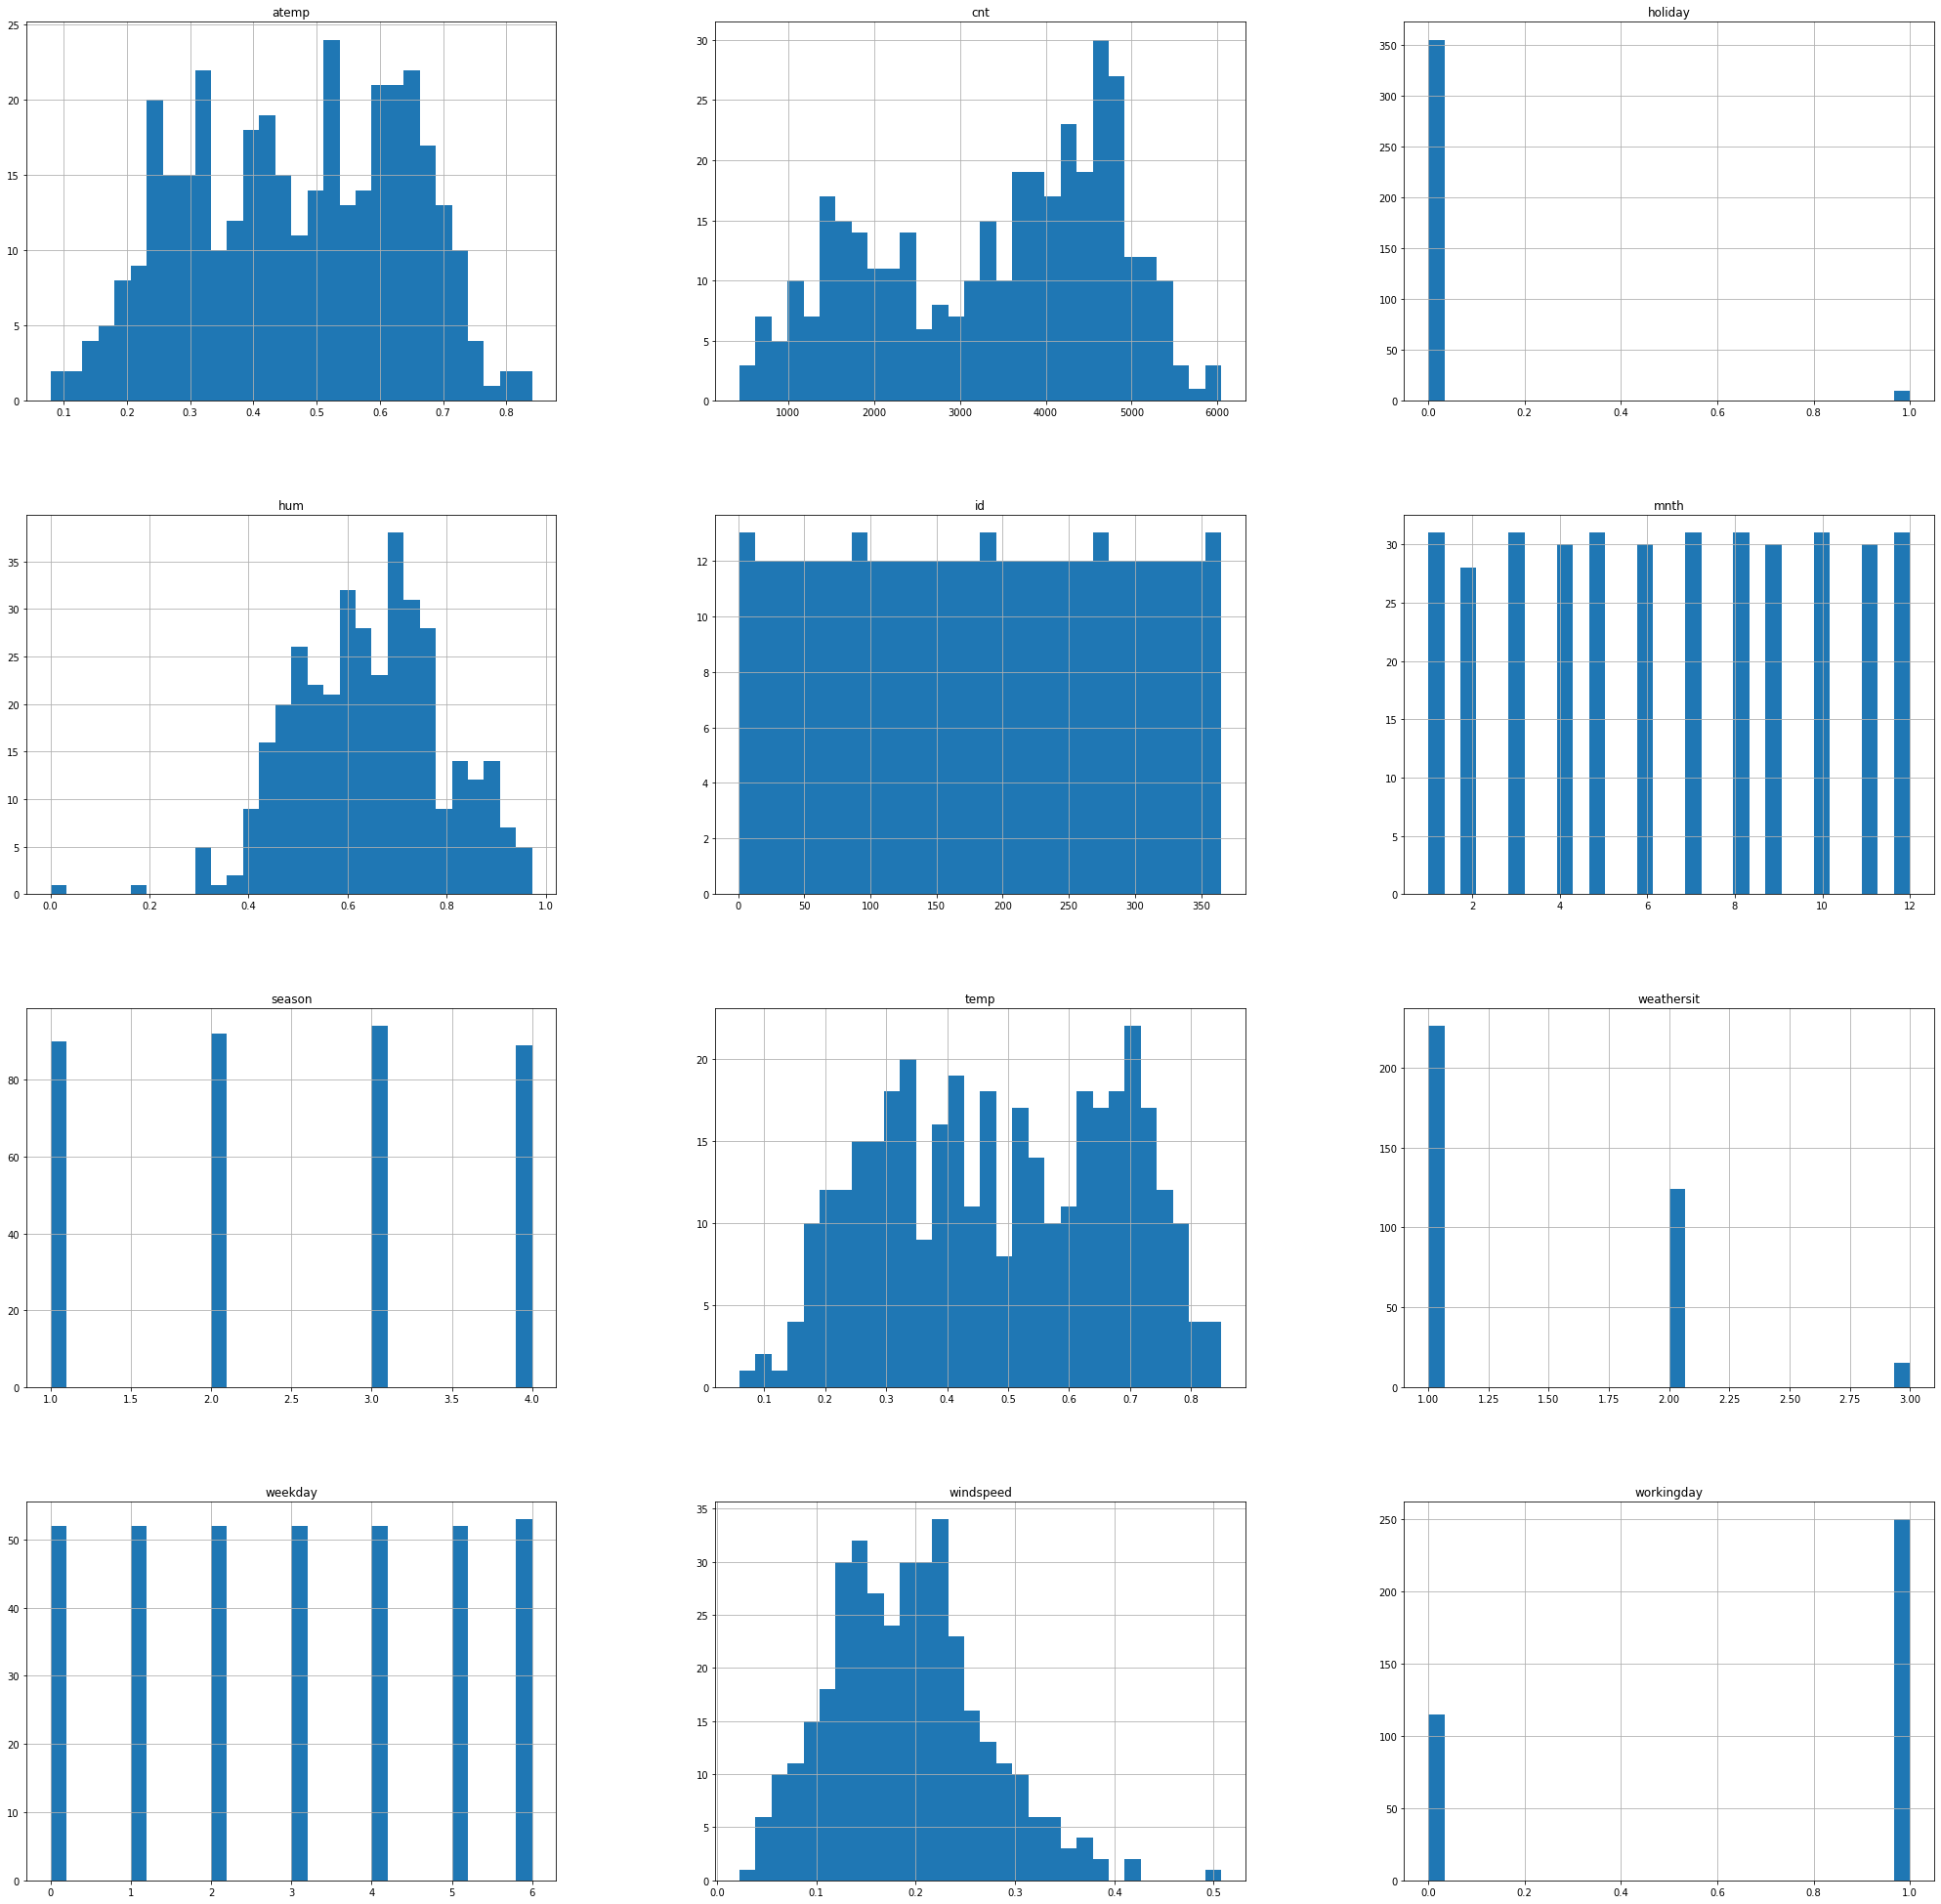

In [7]:
df_train.hist(bins=30, figsize=(35, 35))
plt.show()

In [8]:
# category_cols = ['season','holiday', 'weekday' , 'workingday', 'weathersit']

# for col in category_cols:
#     df_train[col] = df_train[col].astype('category')
#     df_test[col] = df_test[col].astype('category')

# df_test.dtypes

In [9]:
df_train.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [10]:
corr = df_train.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
id,1,0.827496,0.996517,0.0339285,0.0117985,-0.00464578,-0.017496,0.281199,0.285149,0.231352,-0.225429,0.388885
season,0.827496,1,0.831141,0.000246779,-0.0116672,0.00711079,0.0115745,0.370002,0.369839,0.233866,-0.231759,0.49043
mnth,0.996517,0.831141,1,0.0330081,0.0128161,-0.00443734,-0.0143114,0.278527,0.282885,0.229477,-0.22796,0.391098
holiday,0.0339285,0.000246779,0.0330081,1,-0.0761242,-0.247461,0.000936445,-0.0174422,-0.0242119,-0.0344065,0.0111502,-0.0555122
weekday,0.0117985,-0.0116672,0.0128161,-0.0761242,1,0.0193977,0.046354,-0.0417697,-0.0475324,-0.0708404,0.0638377,0.00972
workingday,-0.00464578,0.00711079,-0.00443734,-0.247461,0.0193977,1,0.10224,0.044359,0.0422598,0.0403008,0.0144971,0.00929157
weathersit,-0.017496,0.0115745,-0.0143114,0.000936445,0.046354,0.10224,1,-0.0979744,-0.107883,0.597699,0.108505,-0.304835
temp,0.281199,0.370002,0.278527,-0.0174422,-0.0417697,0.044359,-0.0979744,1,0.997956,0.141767,-0.117795,0.762291
atemp,0.285149,0.369839,0.282885,-0.0242119,-0.0475324,0.0422598,-0.107883,0.997956,1,0.146986,-0.134729,0.767151
hum,0.231352,0.233866,0.229477,-0.0344065,-0.0708404,0.0403008,0.597699,0.141767,0.146986,1,-0.194538,-0.0194795


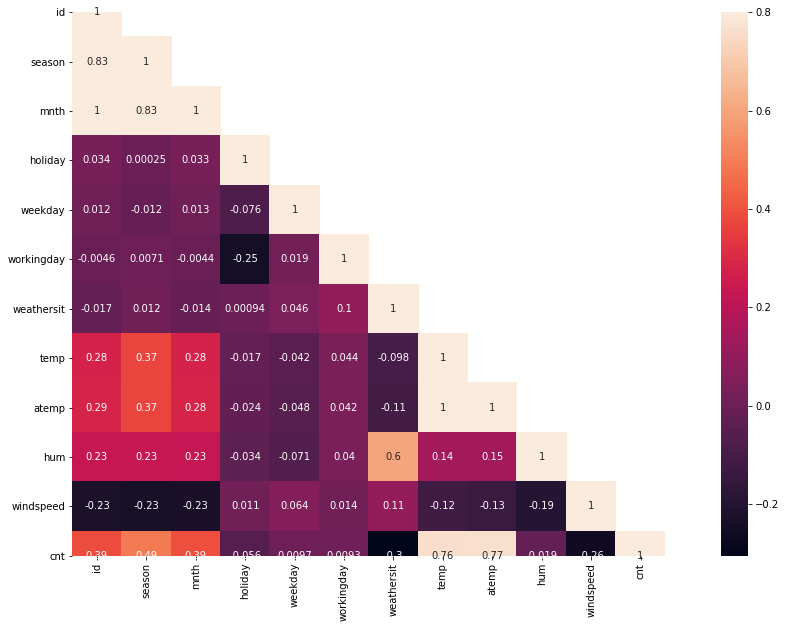

In [11]:
corrMatt = df_train.corr(method='spearman')
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

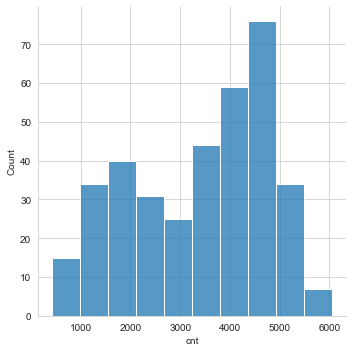

In [12]:
sns.set_style('whitegrid')
sns.displot(df_train.cnt)

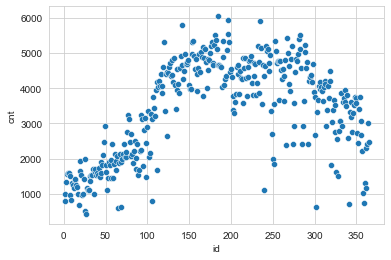

In [13]:
sns.scatterplot(x=df_train.id, y=df_train.cnt)

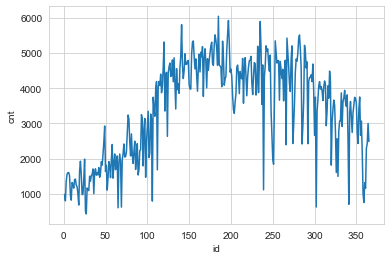

In [14]:
sns.lineplot(x=df_train.id, y=df_train.cnt)

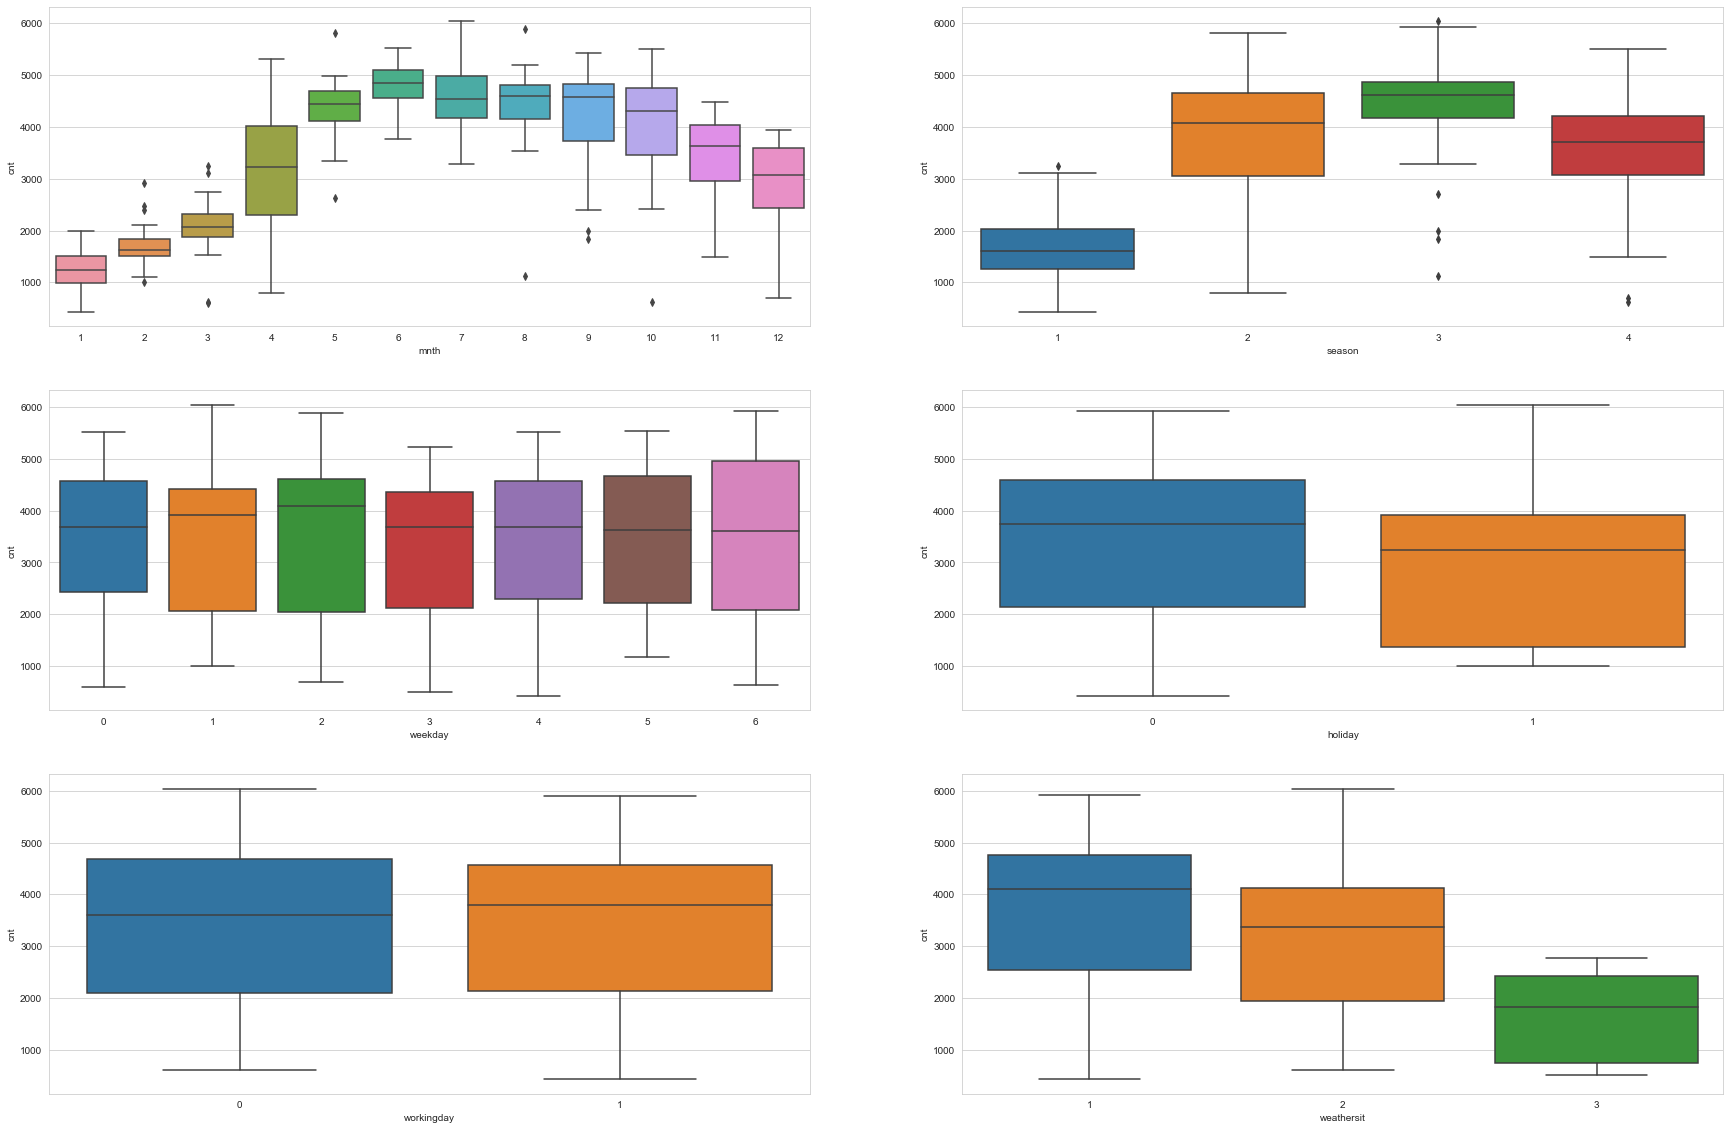

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(30, 20)
sns.boxplot(y=df_train.cnt,x=df_train.mnth,ax=axes[0][0])
sns.boxplot(y=df_train.cnt,x=df_train.season,ax=axes[0][1])
sns.boxplot(y=df_train.cnt,x=df_train.weekday,ax=axes[1][0])
sns.boxplot(y=df_train.cnt,x=df_train.holiday,ax=axes[1][1])
sns.boxplot(y=df_train.cnt,x=df_train.workingday,ax=axes[2][0])
sns.boxplot(y=df_train.cnt,x=df_train.weathersit,ax=axes[2][1])

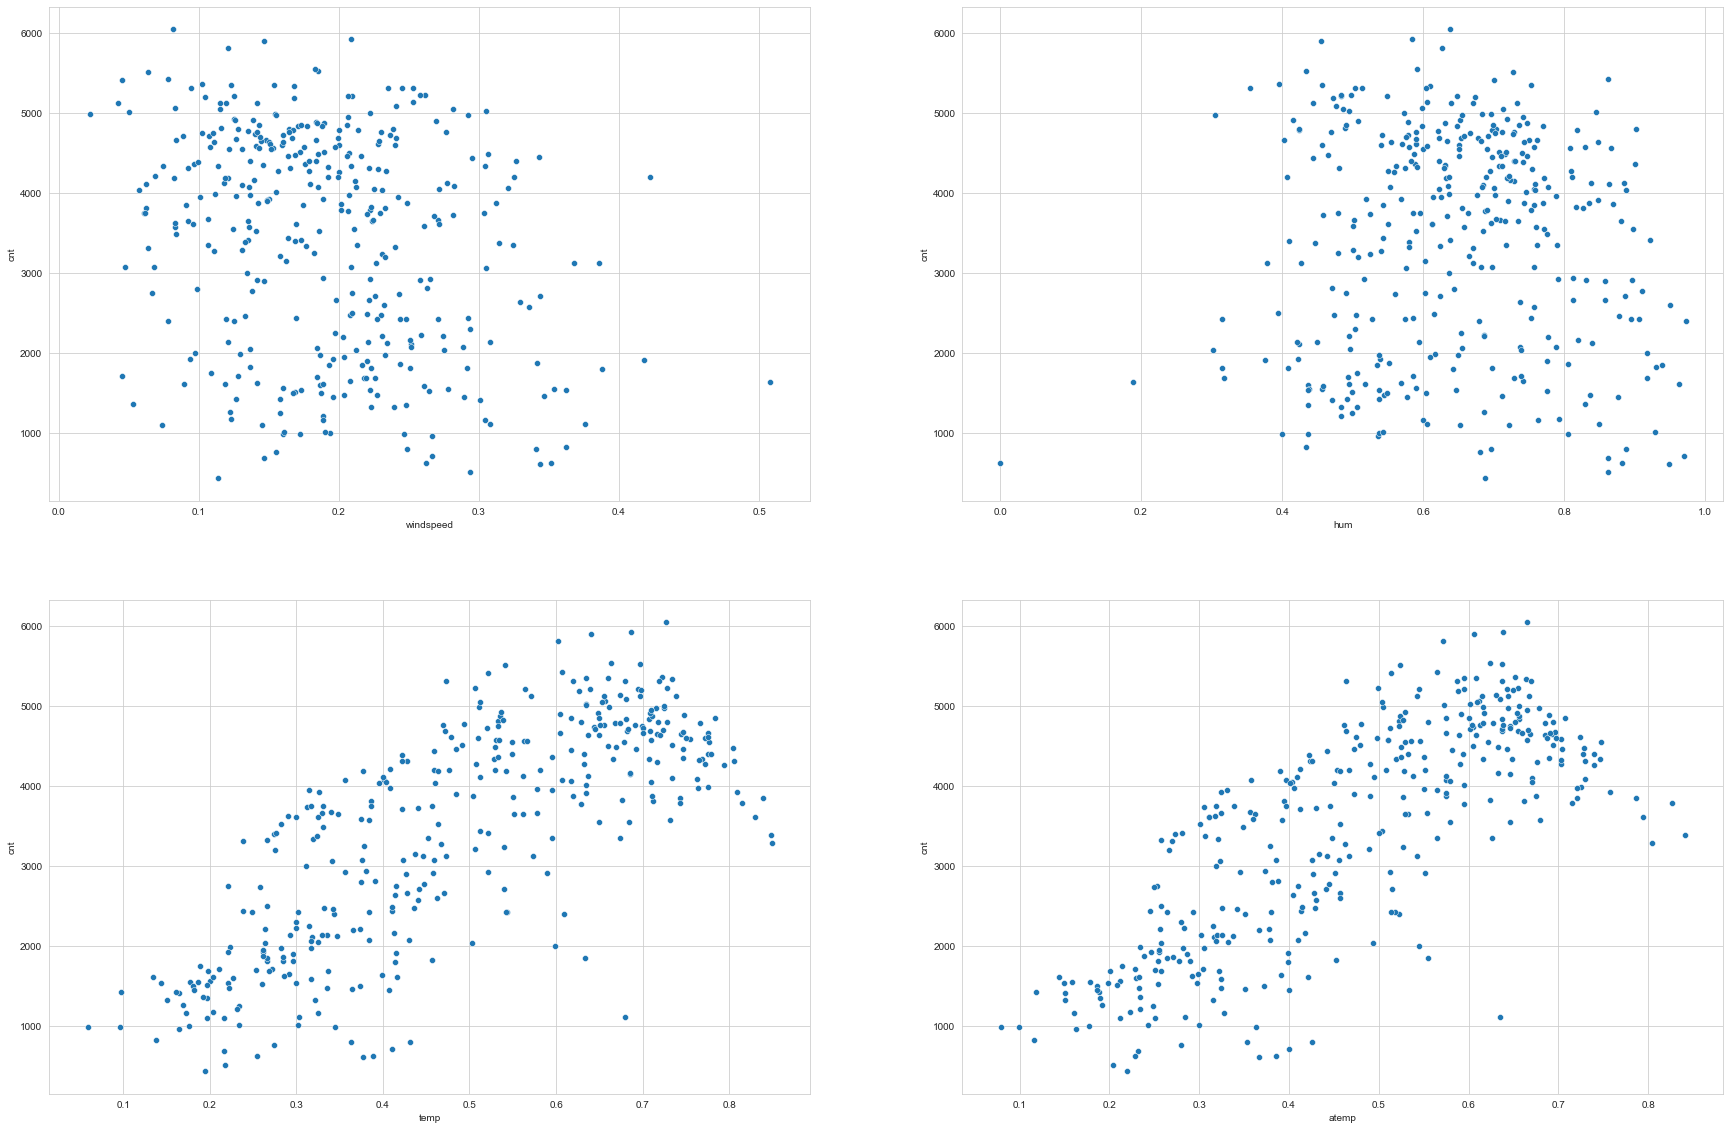

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30, 20)
sns.scatterplot(x=df_train.windspeed, y=df_train.cnt ,ax=axes[0][0])
sns.scatterplot(x=df_train.hum, y=df_train.cnt ,ax=axes[0][1])
sns.scatterplot(x=df_train.temp, y=df_train.cnt,ax=axes[1][0])
sns.scatterplot(x=df_train.atemp, y=df_train.cnt,ax=axes[1][1])

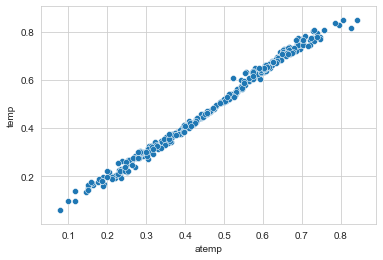

In [17]:
sns.scatterplot(x=df_train.atemp, y=df_train.temp)

## Adding New Variables

In [18]:
df_train['temp_prop']= df_train['temp']/df_train['atemp']
df_test['temp_prop']= df_test['temp']/df_test['atemp']

In [19]:
df_train["atemp_1"]=df_train["atemp"].shift(1)
df_test["atemp_1"]=df_test["atemp"].shift(1)

In [20]:
df_train["atemp_1"].fillna(df_train["atemp"], inplace = True)
df_test["atemp_1"].fillna(df_test["atemp"], inplace = True)

In [21]:
df_train.sort_values('cnt', ascending=False).head(10)

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_prop,atemp_1
184,185,3,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,6043,1.092048,0.668575
196,197,3,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,5923,1.075837,0.624371
234,235,3,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,5895,1.057363,0.638254
140,141,2,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,5805,1.053368,0.529042
195,196,3,7,0,5,1,1,0.663333,0.624371,0.591250,0.182833,5538,1.062402,0.635104
180,181,3,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,5515,1.093655,0.654688
281,282,4,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,5511,1.032158,0.513242
266,267,4,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,5423,1.074866,0.522125
280,281,4,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,5409,1.016415,0.504404
181,182,3,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,5362,1.107854,0.637008


In [22]:
def summer_fall_and_m6_10_func(_season: int, _mnth: int, _weathersit: int) -> int:
    """
    return 1 or 0
    """
    if _season in [3,4] and 6<=_mnth<=11 and _weathersit ==1:
        return 1
    else:
        return 0

df_train['summer_fall_and_m6_10'] = df_train.apply(lambda r: summer_fall_and_m6_10_func(r.season, r.mnth, r.weathersit), axis=1)
df_test['summer_fall_and_m6_10'] = df_test.apply(lambda r: summer_fall_and_m6_10_func(r.season, r.mnth, r.weathersit), axis=1)

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(df_train[['temp', 'atemp']])

print(f" Variance explained after PCA : {pca.explained_variance_ratio_}")

 Variance explained after PCA : [0.99825245]


In [24]:
from scipy.stats import norm
df_train['temperature']=pca.fit_transform(df_train[['temp','atemp']])
df_test['temperature']=pca.fit_transform(df_test[['temp','atemp']])

In [25]:
pca=PCA(n_components=1)
pca.fit(df_train[['id', 'mnth']])

print(f" Variance explained after PCA : {pca.explained_variance_ratio_}")

 Variance explained after PCA : [0.99999254]


In [26]:
df_train['period']=pca.fit_transform(df_train[['id', 'mnth']])
df_test['period']=pca.fit_transform(df_test[['id', 'mnth']])

In [27]:
pca=PCA(n_components=1)
pca.fit(df_train[['weathersit', 'hum']])

print(f" Variance explained after PCA : {pca.explained_variance_ratio_}")

 Variance explained after PCA : [0.95903385]


In [28]:
df_train['weathersit_hum']=pca.fit_transform(df_train[['weathersit', 'hum']])
df_test['weathersit_hum']=pca.fit_transform(df_test[['weathersit', 'hum']])

In [29]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale
df_train['atemp_scaled']= minmax_scale(df_train['atemp'])
df_train['id_scaled']= minmax_scale(df_train['id'])
df_train['mnth_scaled']= minmax_scale(df_train['mnth'])
df_train['hum_scaled']= minmax_scale(df_train['hum'])
df_train['windspeed']= minmax_scale(df_train['windspeed'])
df_train['temp_prop_scaled']= minmax_scale(df_train['temp_prop'])
df_test['atemp_scaled']= minmax_scale(df_test['atemp'])
df_test['id_scaled']= minmax_scale(df_test['id'])
df_test['mnth_scaled']= minmax_scale(df_test['mnth'])
df_test['hum_scaled']= minmax_scale(df_test['hum'])
df_test['windspeed']= minmax_scale(df_test['windspeed'])
df_test['temp_prop_scaled']= minmax_scale(df_test['temp_prop'])

### Import libraries

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

## Train Test Split

In [31]:
df_train.columns

Index(['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'temp_prop',
       'atemp_1', 'summer_fall_and_m6_10', 'temperature', 'period',
       'weathersit_hum', 'atemp_scaled', 'id_scaled', 'mnth_scaled',
       'hum_scaled', 'temp_prop_scaled'],
      dtype='object')

In [32]:
selected_features= ['id', 'season', 'mnth', 'holiday',  'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'temp_prop', 'summer_fall_and_m6_10']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_train[selected_features]
y = df_train['cnt']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.18, random_state=14)

In [35]:
selected_features= ['id', 'season', 'mnth', 'holiday',  'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed','summer_fall_and_m6_10','temp_prop']

In [36]:
X_test = df_test[selected_features]

In [37]:
X_train

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,temp_prop,summer_fall_and_m6_10
237,238,3,8,0,5,1,1,0.700000,0.659733,0.761250,0.126931,1.061035,1
31,32,1,2,0,2,1,2,0.192174,0.234530,0.829565,0.063540,0.819401,0
5,6,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.138482,0.876244,0
163,164,2,6,0,1,1,1,0.635000,0.601654,0.494583,0.583333,1.055424,0
170,171,2,6,0,1,1,2,0.635000,0.595346,0.746250,0.274358,1.066607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,3,9,0,3,1,3,0.599167,0.544229,0.917083,0.153852,1.100946,0
327,328,4,11,1,4,0,1,0.373333,0.372471,0.549167,0.298744,1.002314,1
268,269,4,9,0,1,1,2,0.649167,0.589042,0.848333,0.182052,1.102073,0
344,345,4,12,0,0,0,1,0.220833,0.253154,0.490000,0.091018,0.872327,0


In [38]:
X_test

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,summer_fall_and_m6_10,temp_prop
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.368479,0,0.985035
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.716652,0,1.082198
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.807826,0,1.187884
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.349571,0,0.900810
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.211026,0,0.954819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,727,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.768481,0,1.121447
362,728,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.275557,0,0.993284
363,729,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.196836,0,1.045103
364,730,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.770053,0,1.104156


In [39]:
import math
from sklearn import metrics
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5


def rmsle_v2(y, y_pred):
    return np.sqrt(metrics.mean_squared_log_error(y_true=y, y_pred=y_pred))

def create_sample_submission_df(test_pred: np.ndarray)->pd.DataFrame:
    df = pd.DataFrame()
    df['id'] = df_test['id']
    df['cnt'] = test_pred.tolist()
    return df.set_index('id')

def write_sample_submission_to_csv(csv_name: str, test_pred: np.ndarray ):
    df = create_sample_submission_df(test_pred)
    df.to_csv(csv_name)

models_rmsle_error_list = []

# Models

### Support Vector Machine (SVM)

In [40]:
svr_model = SVR()
svr_model.fit(X_train,y_train)
svr_pred_validation = svr_model.predict(X_validation)
models_rmsle_error_list.append({"model": "svm", "rmsle": rmsle_v2(y=y_validation, y_pred=svr_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


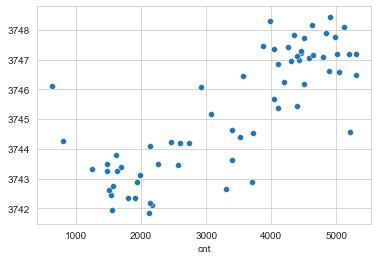

In [41]:
sns.scatterplot(y_validation, svr_pred_validation)

In [42]:
svr_pred_test = svr_model.predict(X_test)
write_sample_submission_to_csv("svr_2.csv", svr_pred_test)

### Gradient Boosting Machine (GBM)

In [43]:
gbm_model = GradientBoostingRegressor(n_estimators=4000,alpha=0.01)
gbm_model.fit(X_train,y_train)
gbm_pred_validation = gbm_model.predict(X_validation)
models_rmsle_error_list.append({"model": "Gradient Boosting Machine", "rmsle": rmsle_v2(y=y_validation, y_pred=gbm_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


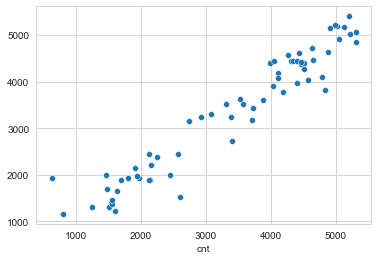

In [44]:
sns.scatterplot(y_validation, gbm_pred_validation)

In [45]:
gbm_pred_test = gbm_model.predict(X_test)
write_sample_submission_to_csv("gbm_23.csv", gbm_pred_test)

### Gradient Boosting Machine (GBM) - GridSearchCV

In [46]:
parameters = {
    "learning_rate": [0.01, 0.02,0.03],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["auto", "log2","sqrt"],
    "criterion": ["auto", "friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [47]:
parameters = {
    "learning_rate": [0.03,0.05,0.07],
    "max_depth":[1,2,3],
    "max_features":["auto", "log2","sqrt"],
    "n_estimators":[3000,4000]
    }

In [48]:
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=10, n_jobs=5)
clf.fit(X_train,y_train)


C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...=None,
                       

In [49]:
print(clf.score(X_train,y_train))
print(clf.best_params_)

0.9999999975146966
{'learning_rate': 0.07, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 4000}


In [50]:
gb_model = GradientBoostingRegressor(random_state=1,  learning_rate= 0.03, max_depth= 3,
                                     max_features= 'auto', 
                                     n_estimators= 3000,subsample= 0.9 )
gb_model.fit(X_train,y_train)
gb_pred_validation = gb_model.predict(X_validation)
models_rmsle_error_list.append({"model": "Gradient Boosting Machine", "rmsle": rmsle_v2(y=y_validation, y_pred=gb_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


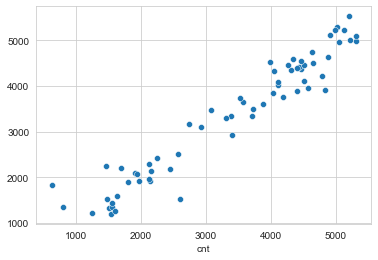

In [51]:
sns.scatterplot(y_validation, gb_pred_validation)

In [52]:
gb_pred_test = gb_model.predict(X_test)
write_sample_submission_to_csv("gb_4.csv", gb_pred_test)

### Adaptive Boosting (ADABoost)

In [53]:
adaboost_model = AdaBoostRegressor(random_state=1)
adaboost_model.fit(X_train,y_train)
adaboost_pred_validation = adaboost_model.predict(X_validation)
models_rmsle_error_list.append({"model": "ADABoost", "rmsle": rmsle_v2(y=y_validation, y_pred=adaboost_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


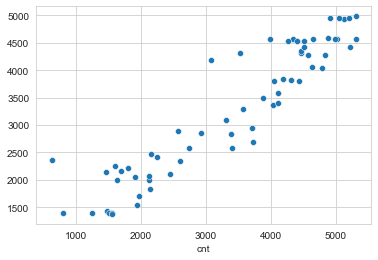

In [54]:
sns.scatterplot(y_validation, adaboost_pred_validation)

In [55]:
adaboost_pred_test = adaboost_model.predict(X_test)
write_sample_submission_to_csv("adaboost_5.csv", adaboost_pred_test)

### Random Forest

In [56]:
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(X_train,y_train)
random_forest_pred_validation = random_forest_model.predict(X_validation)
models_rmsle_error_list.append({"model": "Random Forest", "rmsle": rmsle_v2(y=y_validation, y_pred=random_forest_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


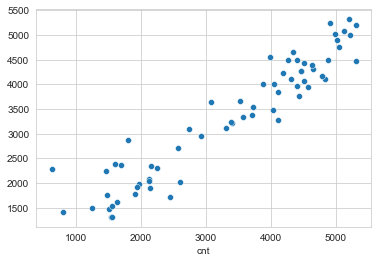

In [57]:
sns.scatterplot(y_validation, random_forest_pred_validation)

In [58]:
random_forest_pred_test = random_forest_model.predict(X_test)
write_sample_submission_to_csv("random_forest_4.csv", random_forest_pred_test)

### Random Forest - GridSearchCV

In [59]:
rfc=RandomForestRegressor(random_state=1)

In [60]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,1,2,3,4,5,6]
}

In [61]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5,

In [62]:
CV_rfc.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [63]:
rfc1=RandomForestRegressor(random_state=1, n_estimators= 500, max_depth=None , max_features='sqrt')

In [64]:
rfc1.fit(X_train,y_train)
rf_pred_validation = rfc1.predict(X_validation)
models_rmsle_error_list.append({"model": "rf", "rmsle": rmsle_v2(y=y_validation, y_pred=rf_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


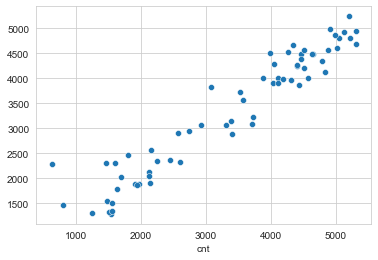

In [65]:
sns.scatterplot(y_validation, rf_pred_validation)

In [66]:
rf_pred_test = rfc1.predict(X_test)
write_sample_submission_to_csv("rf_3.csv", rf_pred_test)

### Decision Tree

In [67]:
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train,y_train)
decision_tree_pred_validation = decision_tree_model.predict(X_validation)
models_rmsle_error_list.append({"model": "Decision Tree", "rmsle": rmsle_v2(y=y_validation, y_pred=decision_tree_pred_validation)})




C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


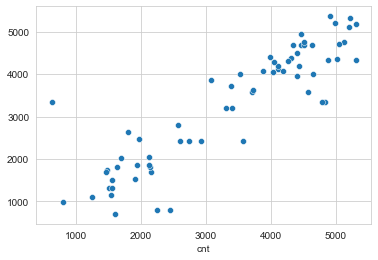

In [68]:
sns.scatterplot(y_validation, decision_tree_pred_validation)

In [69]:
decision_tree_pred_test = decision_tree_model.predict(X_test)
write_sample_submission_to_csv("decision_tree_2.csv", decision_tree_pred_test)

### KNN

In [70]:
knn = KNeighborsRegressor(n_neighbors=3)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_pred_validation = knn_model.predict(X_validation)
models_rmsle_error_list.append({"model": "knn", "rmsle": rmsle_v2(y=y_validation, y_pred=knn_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


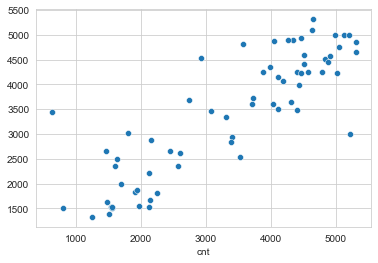

In [71]:
sns.scatterplot(y_validation, knn_pred_validation)

In [72]:
knn_pred_test = knn_model.predict(X_test)
write_sample_submission_to_csv("knn_2.csv", knn_pred_test)

### XGB

In [73]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5,0.01, 0.03, 0.05, 0.07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [1,2,3,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)


In [74]:
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   16.7s
[Parallel(n_jobs=5)]: Done 216 out of 216 | elapsed:   19.0s finished
C:\Users\itzikjan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8474121015358962


In [75]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [76]:
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07,
                max_depth = 5, n_estimators = 500 , nthread= 4, silent= 1, min_child_weight= 1)

In [77]:
xg_reg.fit(X_train,y_train)
xg_pred_validation = xg_reg.predict(X_validation)
models_rmsle_error_list.append({"model": "xg", "rmsle": rmsle_v2(y=y_validation, y_pred=xg_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


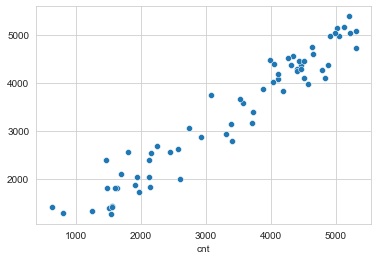

In [78]:
sns.scatterplot(y_validation, xg_pred_validation)

### LGBM

In [79]:
lgb_model = LGBMRegressor()

In [80]:
parameters = {
              'learning_rate': [0.1 ,0.01, 0.05, 0.005],
              'num_leaves': [7, 14, 21, 28, 31, 50, 128, 256],
              'reg_alpha': np.arange(0.1, 1.0, 0.2),
              'reg_lambda': np.arange(0.1, 1.0, 0.2) ,
              'subsample': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [50, 100, 200, 500, 1000]}

In [81]:
CV_lgb= GridSearchCV(estimator=lgb_model, param_grid=parameters)

In [82]:
CV_lgb.fit(X_train, y_train)

C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\itzikjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_l...
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.005],
                         'n_estimators': [50, 100, 200, 500, 1000],
                         'num_leaves': [7, 14, 21, 28, 31, 50, 128, 256],
                         'reg_alpha': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'reg_lambda'

In [83]:
CV_lgb.best_params_

{'learning_rate': 0.01,
 'n_estimators': 1000,
 'num_leaves': 14,
 'reg_alpha': 0.5000000000000001,
 'reg_lambda': 0.1,
 'subsample': 0.5}

In [84]:
lgb_model = LGBMRegressor(random_state=1,  learning_rate= 0.1, num_leaves= 7,
                                     reg_alpha= 0.9000000000000001, reg_lambda= 0.1,
                                     subsample= 0.5, 
                                     n_estimators= 100 )
lgb_model.fit(X_train,y_train)
lgb_pred_validation = lgb_model.predict(X_validation)
models_rmsle_error_list.append({"model": "lgb_model", "rmsle": rmsle_v2(y=y_validation, y_pred=lgb_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


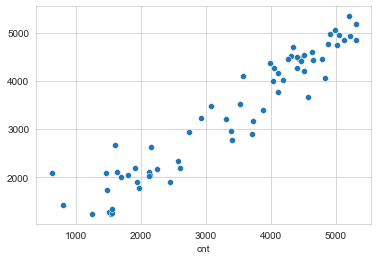

In [85]:
sns.scatterplot(y_validation, lgb_pred_validation)

In [86]:
lgb_pred_test = lgb_model.predict(X_test)
write_sample_submission_to_csv("lgb_8.csv", lgb_pred_test)

### Linear Regression

In [87]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)
linear_regression_pred_validation = linear_regression_model.predict(X_validation)
models_rmsle_error_list.append({"model": "Linear Regression", "rmsle": rmsle_v2(y=y_validation, y_pred=linear_regression_pred_validation)})


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


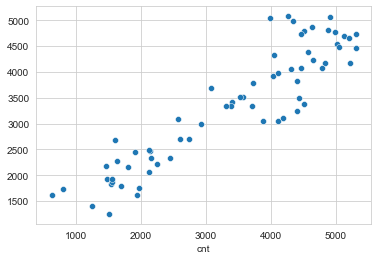

In [88]:
sns.scatterplot(y_validation, linear_regression_pred_validation)

In [89]:
linear_regression_pred_test = linear_regression_model.predict(X_test)
write_sample_submission_to_csv("linear_regression_4.csv", linear_regression_pred_test)

### LASSO

best_rmsle 0.22548334436903214  alpha:  0.0001
best_rmsle 0.2254826714315029  alpha:  0.0002
best_rmsle 0.22548199868205132  alpha:  0.0003
best_rmsle 0.22548065364019548  alpha:  0.0005
best_rmsle 0.2254799813526632  alpha:  0.0006
best_rmsle 0.22547930919971151  alpha:  0.0007
best_rmsle 0.22547863721421577  alpha:  0.0008
best_rmsle 0.22547796542130355  alpha:  0.0009
best_rmsle 0.2254772937173681  alpha:  0.001
best_rmsle 0.22547058584258747  alpha:  0.002
best_rmsle 0.22546389373674308  alpha:  0.003
best_rmsle 0.225450556450683  alpha:  0.005
best_rmsle 0.22544391138308406  alpha:  0.006
best_rmsle 0.2254372818284252  alpha:  0.007
best_rmsle 0.22543066825574135  alpha:  0.008
best_rmsle 0.22542407075128942  alpha:  0.009
best_rmsle 0.2254174884093728  alpha:  0.01
best_rmsle 0.22535253338341585  alpha:  0.02
best_rmsle 0.22528915624319185  alpha:  0.03
best_rmsle 0.225167143579772  alpha:  0.05
best_rmsle 0.22510850847528024  alpha:  0.06
best_rmsle 0.22505145188736822  alpha:  

C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


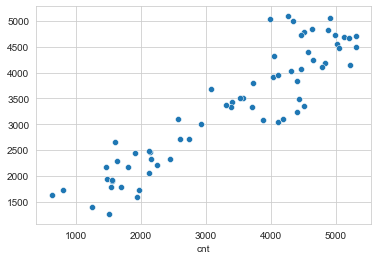

In [90]:
from numpy import arange

best_alpha = 0
best_rmsle = 100

for alpha in [1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,
                   1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3,
                   1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,
                   0.9,0.8,0.7,0.6,0.5,0.4,0.2,0.1]:
    lasso_model = Lasso(alpha=alpha, max_iter=100000)
    lasso_model.fit(X_train, y_train)
    
    lasso_pred_validation = lasso_model.predict(X_validation)
    lasso_rmsle = rmsle_v2(y=y_validation, y_pred=lasso_pred_validation)
    
    if lasso_rmsle <best_rmsle:
        best_alpha = alpha
        best_rmsle = lasso_rmsle
        print("best_rmsle", best_rmsle, " alpha: ", alpha)
    
models_rmsle_error_list.append({"model": "lasso_model_alpha_"+str(best_alpha), "rmsle": best_rmsle})
sns.scatterplot(y_validation, lasso_pred_validation)

In [91]:
lasso_pred_test = lasso_model.predict(X_test)
write_sample_submission_to_csv("lasso_5.csv", lasso_pred_test)

### Ridge

best_rmsle 0.22547207510223866  alpha:  0.0001
best_rmsle 0.22546039159896686  alpha:  0.0002
best_rmsle 0.2254489587441142  alpha:  0.0003
best_rmsle 0.2254268138752421  alpha:  0.0005
best_rmsle 0.22541608708930808  alpha:  0.0006
best_rmsle 0.22540558137746455  alpha:  0.0007
best_rmsle 0.22539529006696057  alpha:  0.0008
best_rmsle 0.22538520674584947  alpha:  0.0009
best_rmsle 0.22537532525057324  alpha:  0.001
best_rmsle 0.22528641069067382  alpha:  0.002
best_rmsle 0.22521236329460573  alpha:  0.003
best_rmsle 0.2250961306609595  alpha:  0.005
best_rmsle 0.22504967970830264  alpha:  0.006
best_rmsle 0.22500904772414818  alpha:  0.007
best_rmsle 0.22497319895043283  alpha:  0.008
best_rmsle 0.22494132920865956  alpha:  0.009
best_rmsle 0.22491280512334608  alpha:  0.01
best_rmsle 0.22473529234013356  alpha:  0.02
best_rmsle 0.22464926646695524  alpha:  0.03
best_rmsle 0.2245732164061815  alpha:  0.05
best_rmsle 0.22455893344605599  alpha:  0.06
best_rmsle 0.2245544191219786  alph

C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


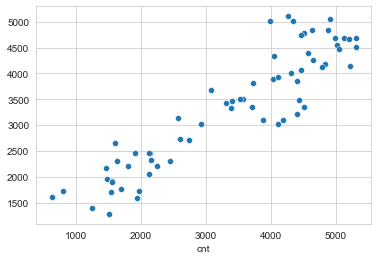

In [92]:
best_alpha = 0
best_rmsle = 100

for alpha in [1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,
                   1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3,
                   1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,
                   0.9,0.8,0.7,0.6,0.5,0.4,0.2,0.1]:
    ridge_model = Ridge(alpha=alpha, max_iter=100000)
    ridge_model.fit(X_train, y_train)
    
    ridge_pred_validation = ridge_model.predict(X_validation)
    ridge_rmsle = rmsle_v2(y=y_validation, y_pred=ridge_pred_validation)
    
    if ridge_rmsle <best_rmsle:
        best_alpha = alpha
        best_rmsle = ridge_rmsle
        print("best_rmsle", best_rmsle, " alpha: ", alpha)
    
models_rmsle_error_list.append({"model": "ridge_model_alpha_"+str(best_alpha), "rmsle": best_rmsle})
sns.scatterplot(y_validation, ridge_pred_validation)



### ElasticNet

best_rmsle 0.2248065263861211  alpha:  0.0001
best_rmsle 0.22464993748856976  alpha:  0.0002
best_rmsle 0.22458555826705104  alpha:  0.0003
best_rmsle 0.2245552305668706  alpha:  0.0005


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


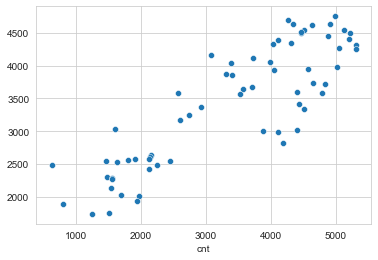

In [93]:
best_alpha = 0
best_rmsle = 100

for alpha in [1e-4,2e-4,3e-4,5e-4,6e-4,7e-4,8e-4,9e-4,
                   1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3,
                   1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,
                   0.9,0.8,0.7,0.6,0.5,0.4,0.2,0.1]:
    elasticnet_model = ElasticNet(alpha=alpha, max_iter=100000)
    elasticnet_model.fit(X_train, y_train)
    
    elasticnet_pred_validation = elasticnet_model.predict(X_validation)
    elasticnet_rmsle = rmsle_v2(y=y_validation, y_pred=elasticnet_pred_validation)
    
    if elasticnet_rmsle <best_rmsle:
        best_alpha = alpha
        best_rmsle = elasticnet_rmsle
        print("best_rmsle", best_rmsle, " alpha: ", alpha)
    
models_rmsle_error_list.append({"model": "elasticnet_model_alpha_"+str(best_alpha), "rmsle": best_rmsle})
sns.scatterplot(y_validation, elasticnet_pred_validation)


In [94]:
elasticnet_pred_test = elasticnet_model.predict(X_test)
write_sample_submission_to_csv("elasticnet_2.csv", elasticnet_pred_test)

# Results

In [95]:
pd.DataFrame(models_rmsle_error_list).sort_values("rmsle")

,model,rmsle
8,xg,0.170088
1,Gradient Boosting Machine,0.188703
2,Gradient Boosting Machine,0.192319
9,lgb_model,0.211829
5,rf,0.212985
12,ridge_model_alpha_0.07,0.224554
13,elasticnet_model_alpha_0.0005,0.224555
4,Random Forest,0.224742
11,lasso_model_alpha_0.1,0.224890
10,Linear Regression,0.225484


## Linear Regression and PCA 

In [96]:
#build function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [97]:
#build a new dataframe
df_std = df_train[['id', 'season', 'mnth', 'holiday',  'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'summer_fall_and_m6_10',  'temp_prop', 'cnt']].copy()
df_std

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,summer_fall_and_m6_10,temp_prop,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.284606,0,0.946489,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.466215,0,1.027532,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.465740,0,1.036741,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.284297,0,0.942854,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.339143,0,0.989911,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,1,12,0,2,1,2,0.325000,0.327633,0.762500,0.342338,0,0.991964,1162
361,362,1,12,0,3,1,1,0.299130,0.279974,0.503913,0.559854,0,1.068421,2302
362,363,1,12,0,4,1,1,0.248333,0.263892,0.574167,0.200012,0,0.941040,2423
363,364,1,12,0,5,1,1,0.311667,0.318812,0.636667,0.230781,0,0.977589,2999


In [98]:
#looking at the descriptive stats now
df_std.describe().iloc[1:3:]

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,summer_fall_and_m6_10,temp_prop,cnt
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.348425,0.290411,1.030227,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.158513,0.454575,0.054885,1378.753666


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

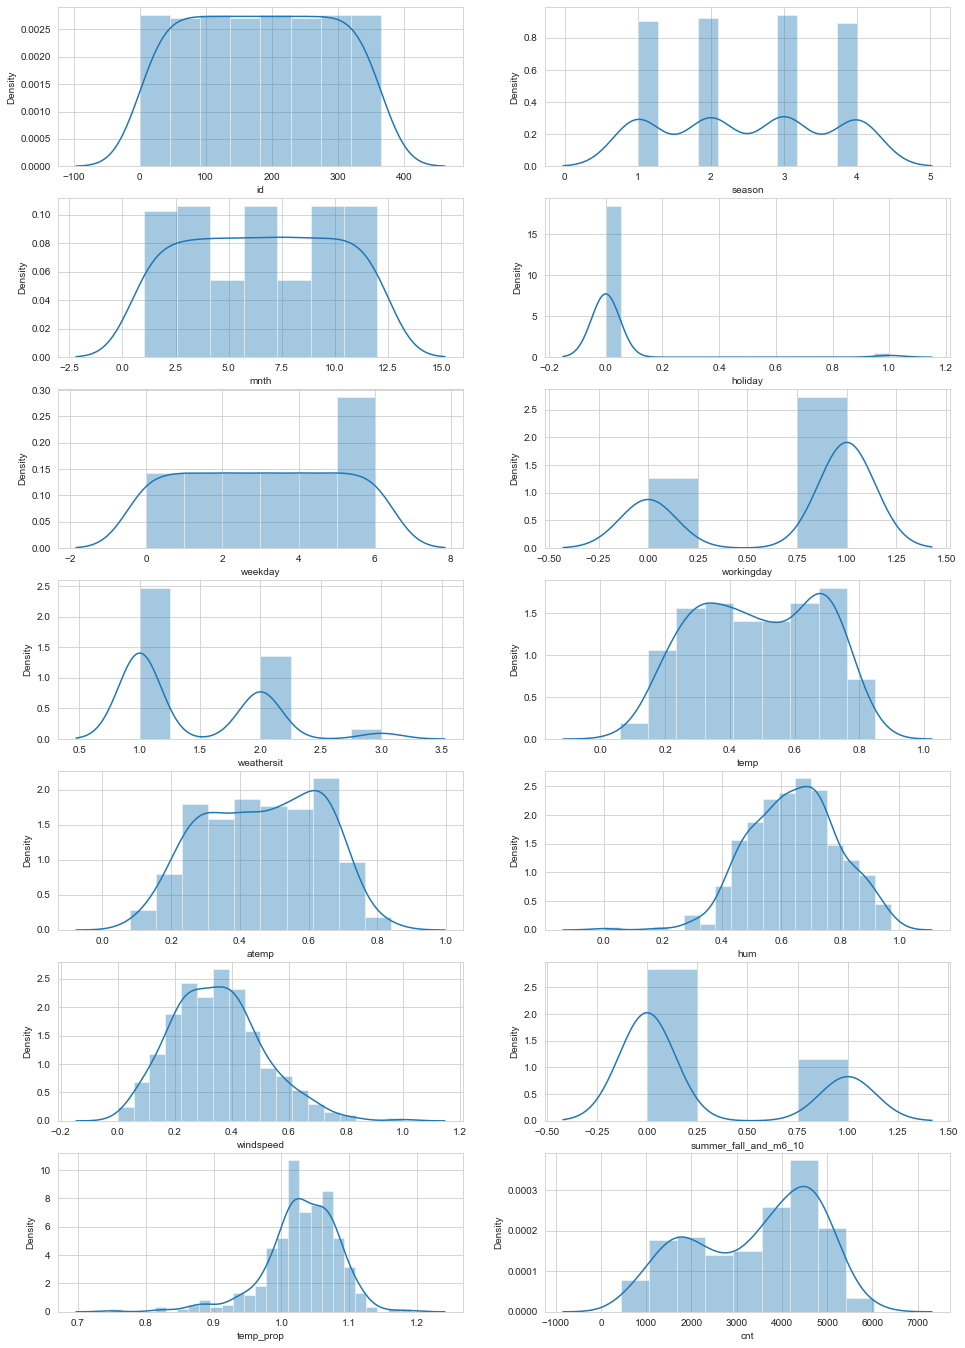

In [99]:
#looking at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std[i],ax=ax)

In [100]:
pca = PCA(n_components=13)
X = df_std.drop('cnt',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
df_std_pca['cnt'] = df_std['cnt']

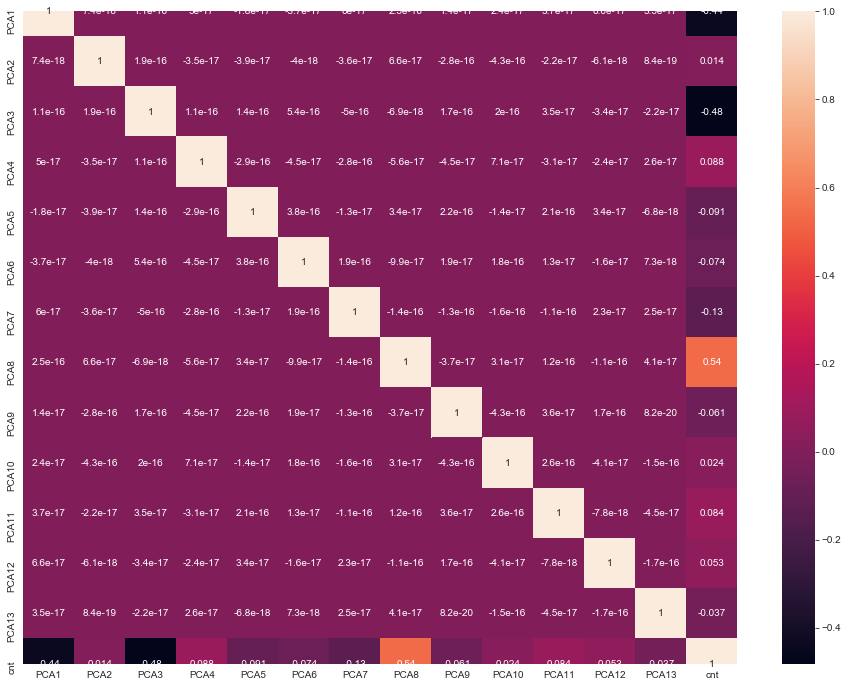

In [101]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_std_pca.corr(),annot=True)

C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

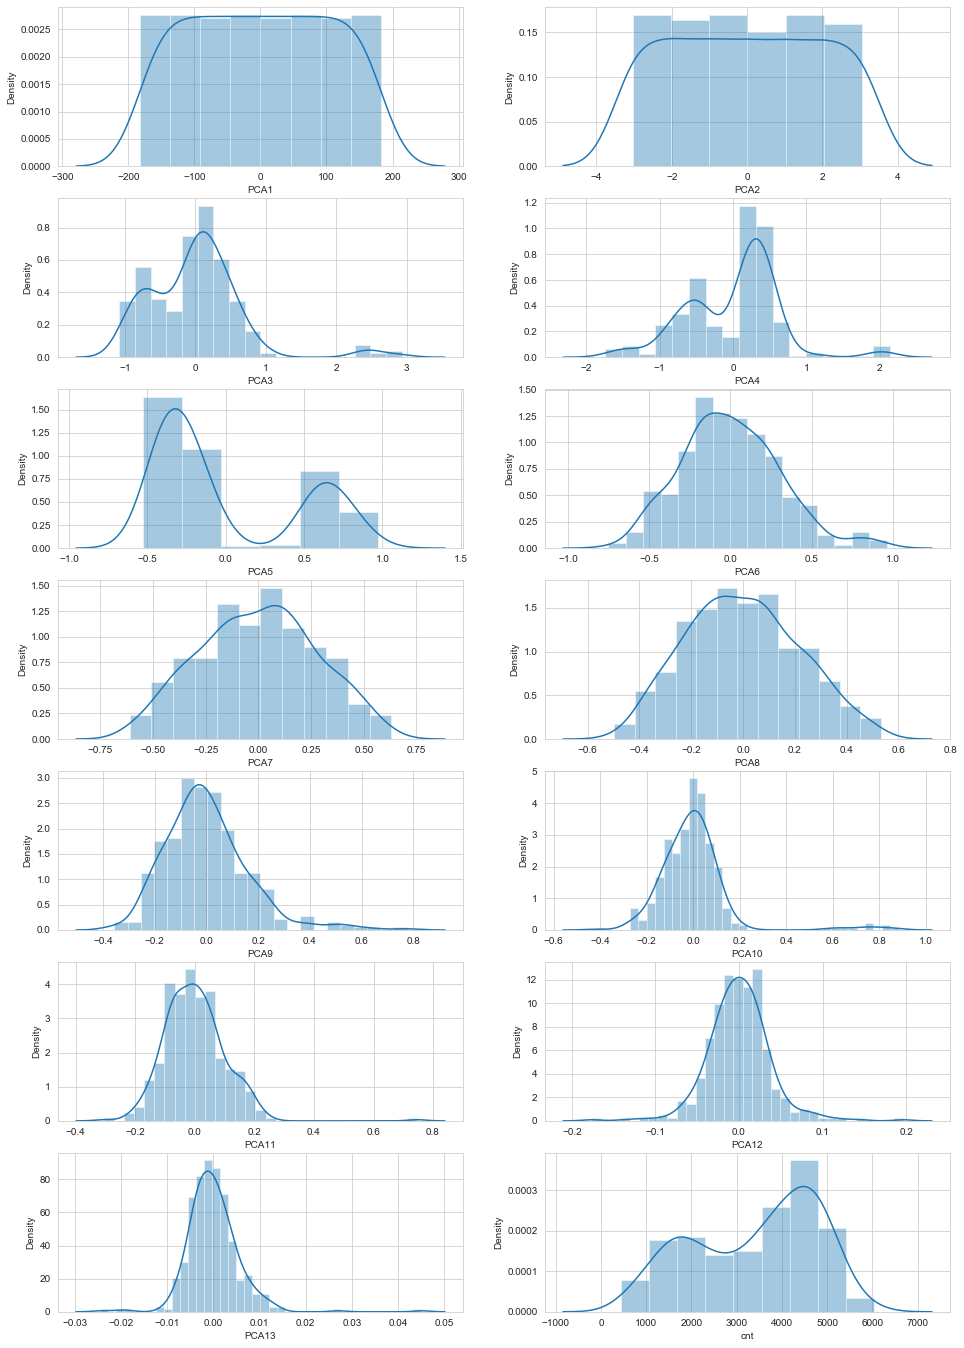

In [102]:
#looking at the distribution of my features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

In [103]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
X = np.array(df_std_pca.drop('cnt',axis=1))
y = np.array(df_std_pca['cnt'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

Shape of Data is (292, 13)
Shape of Data is (73, 13)
Shape of Data is (292,)
Shape of Data is (73,)


In [104]:
# Lets train our model on training data and predict also on training to see results
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.766039136554733 | Root Mean Square Error is : 667.8823280712962


In [105]:
# Lets train our model on training data and predict on testing to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R2 Score is : 0.7871377068859091 | Root Mean Square Error is : 627.552432964368


C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


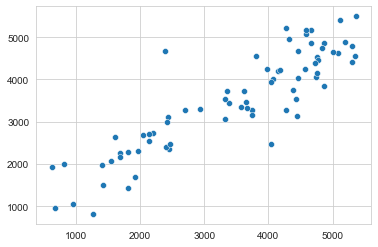

In [106]:
sns.scatterplot(y_test, y_pred)

# The end